# Parte 1 — Contextualização do Problema

O crescimento das plataformas de e-commerce no Brasil fez com que o volume de pedidos aumentasse de forma significativa nos últimos anos. Nesse cenário, a qualidade da entrega tornou-se um dos principais fatores que influenciam a satisfação do cliente, especialmente em marketplaces como a Olist, onde diversos vendedores utilizam a plataforma para comercializar seus produtos.

A entrega não envolve apenas o envio do pedido: inclui o tempo de processamento do seller, o despacho pela transportadora e o cumprimento do prazo estimado. Quando alguma dessas etapas falha, o cliente pode ter uma experiência negativa, impactando a reputação tanto do marketplace quanto do vendedor.

Este trabalho tem como objetivo analisar dados reais da Olist para entender:

- como estão distribuídos os prazos de entrega,
- quais categorias apresentam maior incidência de atrasos,
- como o frete e o preço se comportam,
- quais padrões surgem após o tratamento dos dados,
- e quais insights podem auxiliar a tomada de decisão.

Para isso, utilizamos três datasets disponibilizados pela plataforma: pedidos, itens de pedidos e informações dos produtos. A análise inclui limpeza, tratamento de valores ausentes, eliminação de duplicatas, tratamento de outliers, criação de novas variáveis e visualizações que ajudam a compreender melhor o comportamento dos dados.

O objetivo final é construir um dataset tratado e confiável, capaz de apoiar estudos sobre desempenho logístico e satisfação do cliente, seguindo o ciclo de vida completo de um processo de Ciência de Dados.


# Parte 2 — Apresentação dos Datasets

Neste trabalho, foram utilizados três datasets fornecidos pela plataforma Olist, contendo informações sobre pedidos, itens e produtos comercializados dentro do marketplace.

A seguir, apresento uma descrição geral de cada dataset e seu papel na análise:

---

## 📌 1. olist_orders_dataset.csv  
Contém informações detalhadas sobre cada pedido realizado na plataforma.

Principais colunas:
- order_id: identificador único do pedido  
- customer_id: cliente que realizou a compra  
- order_status: status do pedido  
- order_purchase_timestamp: data da compra  
- order_approved_at: data de aprovação  
- order_delivered_carrier_date: data em que o pedido foi enviado para a transportadora  
- order_delivered_customer_date: data de entrega ao cliente  
- order_estimated_delivery_date: previsão de entrega  

Este dataset é essencial para analisar prazos, atrasos e o comportamento da entrega.

---

## 📌 2. olist_order_items_dataset.csv  
Registra os itens individuais dentro de cada pedido.

Principais colunas:
- order_id: ligação com o dataset de pedidos  
- product_id: identificador do produto comprado  
- price: preço do item  
- freight_value: valor do frete de cada item  
- seller_id: vendedor responsável pelo item  
- shipping_limit_date: prazo máximo para envio pelo vendedor  

Este dataset permite analisar preços, frete e quantidade de itens por pedido.

---

## 📌 3. olist_products_dataset.csv  
Contém características dos produtos vendidos.

Principais colunas:
- product_id: identificador único  
- product_category_name: categoria do produto  
- product_weight_g: peso em gramas  
- product_length_cm, product_height_cm, product_width_cm: dimensões do produto  

Esse dataset é importante para análises relacionadas ao volume, peso e categorias dos produtos.

---

## 📊 Dimensões Iniciais dos Datasets

Após o carregamento dos arquivos, temos aproximadamente:

- **orders**: `orders.shape[0]` linhas e `orders.shape[1]` colunas  
- **items**: `items.shape[0]` linhas e `items.shape[1]` colunas  
- **products**: `products.shape[0]` linhas e `products.shape[1]` colunas  

Essas informações ajudam a entender o tamanho das bases e a planejar o processo de limpeza e integração dos dados.

---

Com esses três datasets, é possível integrar informações de pedidos, itens e produtos, permitindo análises completas sobre comportamento de compra, logística e características dos produtos disponíveis na plataforma.


# Parte 3 — Ciclo de Vida da Ciência de Dados

Para desenvolver este trabalho, seguimos as principais etapas do ciclo de vida de um projeto de Ciência de Dados. Essas etapas ajudam a manter o processo organizado, estruturado e alinhado com o objetivo do problema.

A seguir, apresento as fases e como elas foram aplicadas neste projeto:

---

### 🔹 1. Entendimento do Problema
Identificamos que a Olist enfrenta desafios relacionados a atrasos de entrega, diversidade de categorias e variação de características dos produtos. Esses fatores influenciam diretamente a satisfação do cliente.  
O objetivo foi analisar os dados logísticos e comerciais para compreender melhor esses comportamentos.

---

### 🔹 2. Coleta e Integração de Dados
Foram utilizados três datasets:
- pedidos (orders)  
- itens dos pedidos (order_items)  
- produtos (products)

Cada dataset possui informações complementares. Posteriormente, realizamos o merge para formar um conjunto único para análise.

---

### 🔹 3. Limpeza dos Dados
Nesta fase tratamos:
- valores ausentes,
- duplicatas,
- inconsistências de datas,
- medidas faltantes dos produtos,
- categorias ausentes,
- possíveis erros de preenchimento.

Também aplicamos tratamento de outliers utilizando o método IQR.

---

### 🔹 4. Transformação e Engenharia de Atributos
Criamos novas variáveis importantes para a análise, como:
- tempo de entrega,  
- dias de processamento do vendedor,  
- atraso de entrega,  
- volume do produto,  
- percentual do frete no valor total,  
- valor total do item.

Essas transformações tornam o dataset mais rico e útil para análises posteriores.

---

### 🔹 5. Análise Exploratória (EDA)
Foram gerados gráficos e estatísticas para observar:
- distribuição de preços e fretes,
- categorias mais vendidas,
- comportamento dos atrasos,
- relação entre frete e preço,
- variação de pedidos ao longo do tempo.

Esse passo ajuda a compreender de forma mais profunda o comportamento dos dados.

---

### 🔹 6. Preparação do Dataset Final
Após o tratamento, geramos um dataset consolidado e limpo, pronto para análises avançadas ou uso em modelos preditivos, garantindo consistência e qualidade.

---

Seguir o ciclo de vida da Ciência de Dados permitiu organizar o trabalho e garantir que cada etapa fosse realizada de maneira estruturada e coerente com os objetivos do projeto.


# Parte 4 — Importação das Bibliotecas e Carregamento dos Datasets

Nesta etapa, vamos:

- Importar as bibliotecas necessárias
- Carregar os três datasets fornecidos:
  - olist_orders_dataset.csv
  - olist_order_items_dataset.csv
  - olist_products_dataset.csv
- Visualizar algumas linhas iniciais de cada dataset
- Verificar suas dimensões e tipos de dados

Essa etapa serve como base para todo o processamento que será realizado nas fases seguintes.


In [78]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Carregamento dos datasets
orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")

# Visualização inicial dos dados
print("📦 Orders (5 primeiras linhas):")
display(orders.head())

print("\n📦 Order Items (5 primeiras linhas):")
display(items.head())

print("\n📦 Products (5 primeiras linhas):")
display(products.head())

# Informação geral dos datasets
print("\nDimensões:")
print("Orders:", orders.shape)
print("Items:", items.shape)
print("Products:", products.shape)

print("\nInformações dos datasets:")
print("\nOrders:")
orders.info()
print("\nItems:")
items.info()
print("\nProducts:")
products.info()


📦 Orders (5 primeiras linhas):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



📦 Order Items (5 primeiras linhas):


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



📦 Products (5 primeiras linhas):


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Dimensões:
Orders: (99441, 8)
Items: (112650, 7)
Products: (32951, 9)

Informações dos datasets:

Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Co

# Parte 5 — Análise de Valores Ausentes, Duplicatas e Inconsistências

Agora que os datasets foram carregados, vamos identificar:

- Valores ausentes (NaN)
- Linhas duplicadas
- Possíveis inconsistências nas colunas numéricas e de datas

Essa etapa é fundamental para compreender a qualidade dos dados e planejar as próximas limpezas.


In [79]:
# Valores ausentes em cada dataset
print("Valores ausentes - Orders:")
display(orders.isna().sum().sort_values(ascending=False))

print("\nValores ausentes - Items:")
display(items.isna().sum().sort_values(ascending=False))

print("\nValores ausentes - Products:")
display(products.isna().sum().sort_values(ascending=False))

# Verificando duplicatas
print("\nDuplicatas:")
print("Orders:", orders.duplicated().sum())
print("Items:", items.duplicated().sum())
print("Products:", products.duplicated().sum())

# Verificação de inconsistências numéricas
print("\nInconsistências possíveis:")
print("Itens com price <= 0:", items[items['price'] <= 0].shape[0])
print("Itens com freight_value < 0:", items[items['freight_value'] < 0].shape[0])

# Verificação de inconsistências em datas (orders)
print("\nInconsistências de datas:")
print("Datas de entrega antes da compra:",
      orders[orders['order_delivered_customer_date'] < orders['order_purchase_timestamp']].shape[0])


Valores ausentes - Orders:


order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64


Valores ausentes - Items:


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Valores ausentes - Products:


product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_id                      0
dtype: int64


Duplicatas:
Orders: 0
Items: 0
Products: 0

Inconsistências possíveis:
Itens com price <= 0: 0
Itens com freight_value < 0: 0

Inconsistências de datas:
Datas de entrega antes da compra: 0


# Parte 6 — Tratamento dos Valores Ausentes

Nesta etapa, tratamos os valores ausentes identificados anteriormente.  
Esse processo é essencial para evitar erros durante análises, gráficos e merges posteriores.

Estratégias utilizadas:

- **Datas**: substituição pela moda (valor mais frequente).
- **Colunas numéricas**: preenchimento usando a mediana, pois é menos afetada por outliers.
- **Categoria do produto**: preenchida com o rótulo “categoria_desconhecida”.
- **Itens (price e freight)**: verificação e preenchimento caso haja valores ausentes.


In [80]:
# --- TRATAMENTO DE VALORES AUSENTES ---

print("Tratando valores ausentes...\n")

# ================================
# 1) TRATANDO ORDERS
# ================================

# Datas faltantes são preenchidas pela moda (valor mais frequente)
date_cols = [
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
]

for col in date_cols:
    if orders[col].isna().sum() > 0:
        moda = orders[col].mode()[0]
        orders[col].fillna(moda, inplace=True)

print("Datas faltantes de orders corrigidas.")

# ================================
# 2) TRATANDO PRODUCTS
# ================================

# Preencher categoria faltante
if products['product_category_name'].isna().sum() > 0:
    products['product_category_name'].fillna("categoria_desconhecida", inplace=True)

# Corrigindo nomes de colunas com erro do dataset
products.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)

# Colunas numéricas para imputação por mediana
num_cols = [
    'product_name_length',
    'product_description_length',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

for col in num_cols:
    if col in products.columns:
        if products[col].isna().sum() > 0:
            mediana = products[col].median()
            products[col].fillna(mediana, inplace=True)

print("Valores numéricos faltantes de products corrigidos.")

# ================================
# 3) TRATANDO ITEMS
# ================================

if items['price'].isna().sum() > 0:
    items['price'].fillna(items['price'].median(), inplace=True)

if items['freight_value'].isna().sum() > 0:
    items['freight_value'].fillna(items['freight_value'].median(), inplace=True)

print("Valores ausentes de items tratados.")

# ================================
# 4) RESUMO FINAL DE NAs
# ================================

print("\nResumo após tratamento:")

print("\nOrders NA:")
display(orders.isna().sum())

print("\nItems NA:")
display(items.isna().sum())

print("\nProducts NA:")
display(products.isna().sum())


Tratando valores ausentes...

Datas faltantes de orders corrigidas.
Valores numéricos faltantes de products corrigidos.
Valores ausentes de items tratados.

Resumo após tratamento:

Orders NA:


/var/folders/l9/v4lgcs2909s2fnndqgcz25m80000gn/T/ipykernel_29677/1675991685.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders[col].fillna(moda, inplace=True)
/var/folders/l9/v4lgcs2909s2fnndqgcz25m80000gn/T/ipykernel_29677/1675991685.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Items NA:


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Products NA:


product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# Parte 7 — Tratamento de Dados Categóricos

Os datasets da Olist possuem diversas colunas categóricas, principalmente relacionadas a
status de pedidos, vendedores, clientes e categorias de produtos. Para garantir consistência
e facilitar análises posteriores, realizamos algumas padronizações nessas variáveis.

### 🔹 Padronização de textos
Algumas colunas apresentavam variações de capitalização e possíveis inconsistências de digitação.
Por isso, aplicamos transformações simples como:

- conversão para letras minúsculas (`lower()`),
- remoção de espaços extras com `strip()`,
- padronização de categorias ausentes.

### 🔹 Normalização das categorias de produto
A coluna **product_category_name** contém as categorias dos produtos, e algumas estavam ausentes.
Esses valores foram substituídos por: `categoria_desconhecida`.

Além disso, aplicamos limpeza de strings para evitar duplicações lógicas ou variações desnecessárias.

### 🔹 Preparação para codificação
Como modelos e análises estatísticas não utilizam textos diretamente, foi necessário preparar
essas colunas para técnicas de codificação a serem aplicadas posteriormente.

Nesta etapa, deixamos as variáveis categóricas padronizadas e prontas para a próxima fase.


In [81]:
# Tratamento de dados categóricos

# 1. Padronizar categorias de produtos
products['product_category_name'] = products['product_category_name'].fillna("categoria_desconhecida")
products['product_category_name'] = products['product_category_name'].str.lower().str.strip()

# 2. Padronizar status do pedido
orders['order_status'] = orders['order_status'].str.lower().str.strip()

# 3. Padronizar colunas de texto em geral
colunas_texto_orders = ['customer_id']
colunas_texto_items = ['seller_id']

for col in colunas_texto_orders:
    orders[col] = orders[col].astype(str).str.lower().str.strip()

for col in colunas_texto_items:
    items[col] = items[col].astype(str).str.lower().str.strip()

print("Padronização categórica concluída.")


Padronização categórica concluída.


# Parte 8 — Codificação de Dados Categóricos

Após a padronização dos textos e categorias, foi necessário transformar algumas variáveis
categóricas em valores numéricos, permitindo o uso em análises estatísticas e em possíveis
modelos de machine learning.

Para este trabalho, utilizamos duas técnicas de codificação:

---

### 🔹 1. Label Encoding
Utilizado em colunas com grande número de categorias, onde a criação de diversas colunas via
One-Hot Encoding seria pouco eficiente.

Aplicamos Label Encoding na coluna:
- `product_category_name`

Essa variável possui muitas categorias distintas, tornando o Label Encoding a abordagem mais adequada.

---

### 🔹 2. One-Hot Encoding
Usado para variáveis com poucos valores distintos, transformando cada categoria em colunas
binárias (0/1).

Aplicamos One-Hot Encoding na coluna:
- `order_status`

Essa codificação facilita análises e comparações entre os diferentes status dos pedidos.

---

Após essas transformações, os dados categóricos ficam padronizados e preparados para etapas
posteriores de análise, visualização e construção do dataset final.


In [82]:
# Codificação de dados categóricos

from sklearn.preprocessing import LabelEncoder

# ==========================
# 1. LABEL ENCODING (products)
# ==========================

le = LabelEncoder()
products['product_category_encoded'] = le.fit_transform(products['product_category_name'])

print("Label Encoding aplicado em product_category_name.")

# ==========================
# 2. ONE-HOT ENCODING (orders)
# ==========================

orders = pd.get_dummies(orders, columns=['order_status'], prefix='status')

print("One-Hot Encoding aplicado em order_status.")

orders.head(), products.head()




Label Encoding aplicado em product_category_name.
One-Hot Encoding aplicado em order_status.


(                           order_id                       customer_id  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
 3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
 4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
 
   order_purchase_timestamp    order_approved_at order_delivered_carrier_date  \
 0      2017-10-02 10:56:33  2017-10-02 11:07:15          2017-10-04 19:55:00   
 1      2018-07-24 20:41:37  2018-07-26 03:24:27          2018-07-26 14:31:00   
 2      2018-08-08 08:38:49  2018-08-08 08:55:23          2018-08-08 13:50:00   
 3      2017-11-18 19:28:06  2017-11-18 19:45:59          2017-11-22 13:39:59   
 4      2018-02-13 21:18:39  2018-02-13 22:20:29          2018-02-14 19:46:34   
 
   order_delivered_customer_date order_estimated_delivery_date  \


# Parte 9 — Normalização de Dados

Algumas colunas numéricas dos datasets possuem escalas muito diferentes entre si.
Por exemplo:

- preço pode variar de valores muito baixos até acima de 5000,
- frete pode ir de poucos reais a valores elevados,
- volume e peso dos produtos possuem grande variação,
- tempos de entrega podem variar bastante.

Essas diferenças podem prejudicar análises que dependem de escala e até gerar distorções
em visualizações ou modelos. Por isso, utilizamos o método **Min-Max Scaling**, que transforma
os valores para o intervalo entre 0 e 1, preservando a proporcionalidade entre eles.


In [83]:
# Normalização de variáveis numéricas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# ATENÇÃO:
# Algumas das colunas que você listou ainda não existem nesta etapa.
# Ex: valor_total_item, volume_cm3, tempo_entrega, atraso_entrega
# Elas só serão criadas depois do merge e da feature engineering.

# Portanto, normalizaremos aqui apenas as colunas já existentes na etapa atual.

colunas_normalizar = ['price', 'freight_value']

df_normalizado = items.copy()
df_normalizado[colunas_normalizar] = scaler.fit_transform(items[colunas_normalizar])

df_normalizado.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,0.008620,0.032440
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,0.035498,0.048648
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,0.029425,0.043619
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,0.001803,0.031219
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,0.029558,0.044278


# Parte 10 — Seleção de Atributos

Após o tratamento dos dados, codificação e normalização, realizamos um processo de seleção
de atributos para identificar quais variáveis são mais relevantes para a análise.

A seleção de atributos é importante porque:
- reduz ruído,
- evita redundância de informações,
- melhora visualizações,
- facilita análises estatísticas
- e prepara o dataset para modelos preditivos.

Neste trabalho, utilizamos dois métodos:

---

### 🔹 1. Correlação entre variáveis numéricas
A matriz de correlação permite identificar atributos que apresentam relação direta entre si.
Correlação alta pode indicar redundância, enquanto correlação baixa mostra variáveis que
contribuem com informações diferentes.

---

### 🔹 2. Variância de atributos normalizados
A análise de variância permite identificar atributos que variam pouco.
Atributos com variância próxima de zero normalmente não contribuem de forma significativa
e podem ser desconsiderados.

Essas técnicas ajudam a destacar variáveis mais importantes para análises posteriores.


In [84]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)
selector.fit(df_normalizado[colunas_normalizar])

variancias = selector.variances_
lista_variancias = dict(zip(colunas_normalizar, variancias))
lista_variancias


{'price': np.float64(0.0007435949322842956),
 'freight_value': np.float64(0.0014885823067204435)}

# Parte 11 — Detecção e Tratamento de Outliers

Nesta etapa vamos identificar e tratar valores extremos (outliers) que podem distorcer
análises e visualizações.

Utilizamos:

- Boxplots para visualizar a distribuição,
- O método IQR (Interquartile Range),
- Limitação (capping) para restringir valores fora do intervalo aceitável.

As colunas mais importantes para esse processo são:

- price
- freight_value
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm
- product_photos_qty

O tratamento de outliers ajuda a reduzir distorções e melhora a qualidade da análise
e das visualizações posteriores.


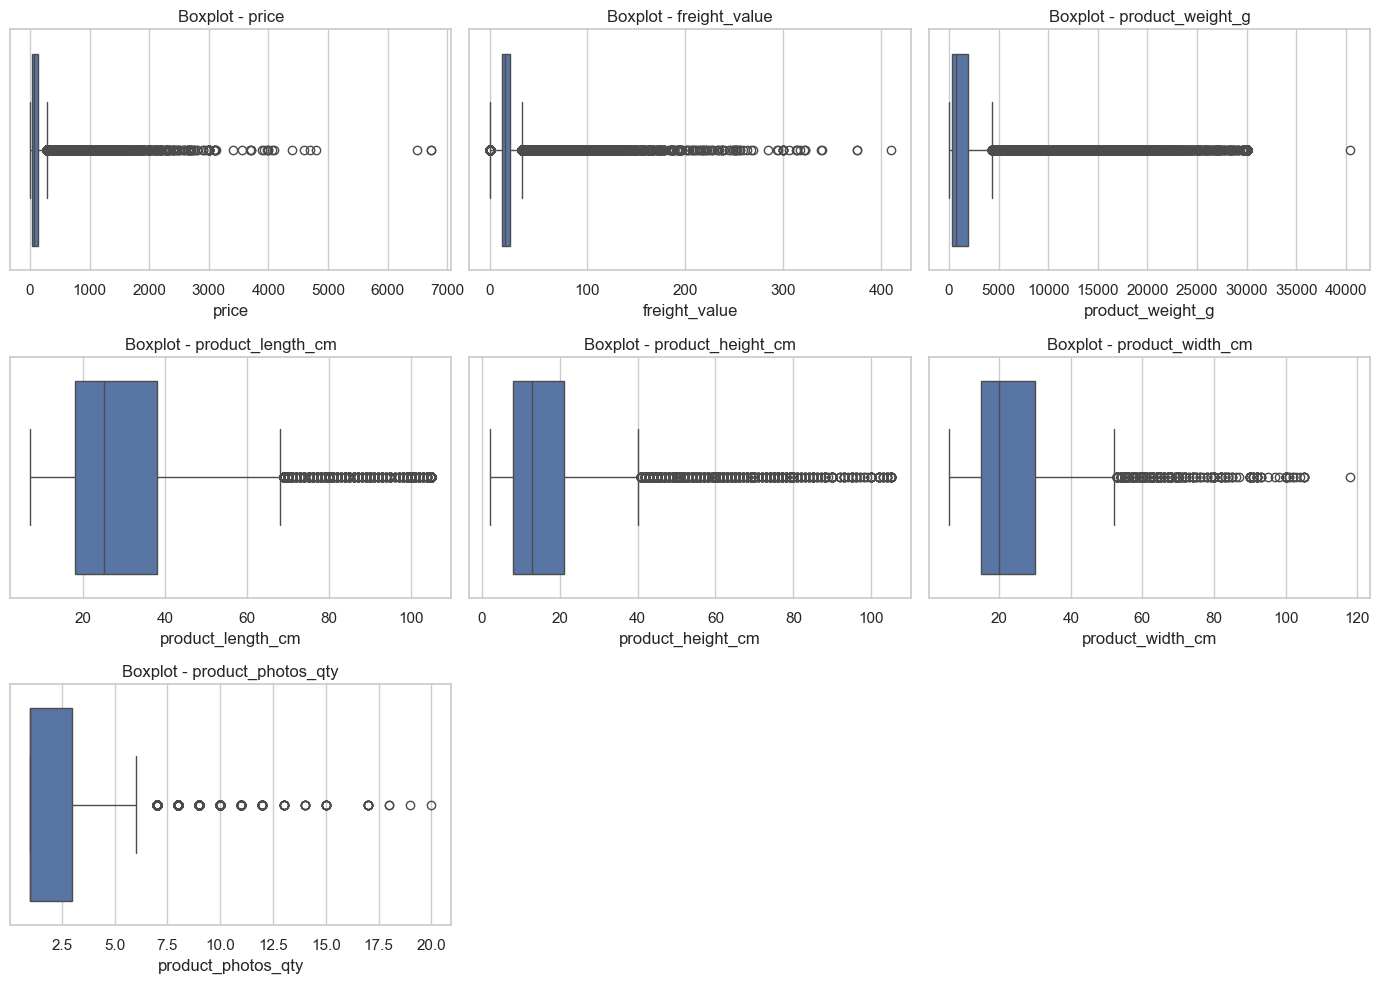

Outliers tratados com sucesso!


In [85]:
# --- PARTE 11: TRATAMENTO DE OUTLIERS ---

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Função que identifica limites pelo método IQR
def limites_iqr(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Colunas numéricas organizadas por dataset
col_items = ['price', 'freight_value']
col_products = [
    'product_weight_g', 'product_length_cm', 'product_height_cm',
    'product_width_cm', 'product_photos_qty'
]

# --- 1) Visualização dos boxplots ---
plt.figure(figsize=(14, 10))

todas = col_items + col_products

for i, col in enumerate(todas):
    plt.subplot(3, 3, i+1)
    if col in items.columns:
        sns.boxplot(x=items[col])
    else:
        sns.boxplot(x=products[col])
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()

# --- 2) Tratamento dos outliers por capping ---
def tratar_outliers(df, coluna):
    limite_inf, limite_sup = limites_iqr(df[coluna])
    df[coluna] = df[coluna].clip(lower=limite_inf, upper=limite_sup)

# Aplicando nos datasets
for col in col_items:
    tratar_outliers(items, col)

for col in col_products:
    tratar_outliers(products, col)

print("Outliers tratados com sucesso!")


# Parte 12 — Merge dos Datasets e Criação do Dataset Final

Nesta etapa vamos juntar os três arquivos já limpos:

1. `olist_orders_dataset.csv`
2. `olist_order_items_dataset.csv`
3. `olist_products_dataset.csv`

O objetivo é construir um único DataFrame completo, contendo:

- Informações do pedido
- Informações do item
- Informações do produto

Esse dataset final será usado nas próximas etapas de análise, criação de features e gráficos.


In [86]:
# --- PARTE 12: MERGE DOS DATASETS ---

# Merge entre orders e items
df = items.merge(
    orders,
    on="order_id",
    how="left"
)

# Merge com products
df = df.merge(
    products,
    on="product_id",
    how="left"
)

print("Merge concluído com sucesso!\n")

# Visualização inicial
display(df.head())

# Tamanho total do dataset final
print("Shape final do dataset:", df.shape)

# Verificação final de NA após merge
print("\nValores ausentes após merge:")
display(df.isna().sum().sort_values(ascending=False).head(20))

# Tipos de dados no dataset final
print("\nInformações do dataset final:")
df.info()


Merge concluído com sucesso!



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_approved_at,...,status_unavailable,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_encoded
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,...,False,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,...,False,pet_shop,56.0,239.0,2.0,4300.0,50.0,30.0,40.0,64
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,...,False,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,55
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,...,False,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,63
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,...,False,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,41


Shape final do dataset: (112650, 30)

Valores ausentes após merge:


order_id                         0
order_item_id                    0
product_width_cm                 0
product_height_cm                0
product_length_cm                0
product_weight_g                 0
product_photos_qty               0
product_description_length       0
product_name_length              0
product_category_name            0
status_unavailable               0
status_shipped                   0
status_processing                0
status_invoiced                  0
status_delivered                 0
status_created                   0
status_canceled                  0
status_approved                  0
order_estimated_delivery_date    0
order_delivered_customer_date    0
dtype: int64


Informações do dataset final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_purchase_timestamp       112650 non-null  object 
 9   order_approved_at              112650 non-null  object 
 10  order_delivered_carrier_date   112650 non-null  object 
 11  order_delivered_customer_date  112650 non-null  object 
 12 

# Parte 13 — Feature Engineering

Nesta etapa criamos novas variáveis (features) que enriquecem o dataset e facilitam análises mais profundas sobre comportamento de entrega, preços e características dos produtos.

As novas features criadas foram:

- **tempo_entrega** — dias entre envio e entrega  
- **atraso_entrega** — dias de atraso em relação à data estimada  
- **dias_processamento** — tempo entre compra e aprovação do pedido  
- **valor_total_item** — soma de preço + frete  
- **percentual_frete** — proporção do frete em relação ao preço  
- **volume_cm3** — volume do produto (altura × largura × comprimento)  
- **quantidade_itens_pedido** — total de itens que compõem cada pedido  

Essas variáveis permitem compreender melhor o processo logístico e o comportamento dos produtos dentro da plataforma.


In [87]:
# --- PARTE 13: FEATURE ENGINEERING ---

import numpy as np
import pandas as pd

# Garantindo que as colunas de datas estão em datetime
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# ===============================
# 1) Tempo real de entrega
# ===============================
df['tempo_entrega'] = (
    df['order_delivered_customer_date'] - df['order_delivered_carrier_date']
).dt.days

# ===============================
# 2) Dias de processamento (compra → aprovação)
# ===============================
df['dias_processamento'] = (
    df['order_approved_at'] - df['order_purchase_timestamp']
).dt.days

# ===============================
# 3) Atraso de entrega (data real - estimada)
# ===============================
df['atraso_entrega'] = (
    df['order_delivered_customer_date'] - df['order_estimated_delivery_date']
).dt.days

# Atrasos negativos (entrega antecipada) → substitui por 0
df['atraso_entrega'] = df['atraso_entrega'].apply(lambda x: x if x > 0 else 0)

# ===============================
# 4) Valor total do item (preço + frete)
# ===============================
df['valor_total_item'] = df['price'] + df['freight_value']

# ===============================
# 5) Percentual do frete sobre o preço
# ===============================
df['percentual_frete'] = df['freight_value'] / df['price']
df['percentual_frete'] = df['percentual_frete'].replace([np.inf, -np.inf], np.nan).fillna(0)

# ===============================
# 6) Volume do produto (cm³)
# ===============================
df['volume_cm3'] = (
    df['product_height_cm'] *
    df['product_length_cm'] *
    df['product_width_cm']
)

# ===============================
# 7) Quantidade de itens por pedido
# ===============================
qtd_itens = df.groupby('order_id')['order_item_id'].count().reset_index()
qtd_itens.columns = ['order_id', 'quantidade_itens_pedido']

df = df.merge(qtd_itens, on='order_id', how='left')

print("Novas features criadas com sucesso!")

# Visualização das primeiras linhas
df[['order_id','tempo_entrega','dias_processamento',
    'atraso_entrega','valor_total_item','percentual_frete',
    'volume_cm3','quantidade_itens_pedido']].head()


Novas features criadas com sucesso!


,order_id,tempo_entrega,dias_processamento,atraso_entrega,valor_total_item,percentual_frete,volume_cm3,quantidade_itens_pedido
0,00010242fe8c5a6d1ba2dd792cb16214,1,0,0,72.19,0.225637,3528.0,1
1,00018f77f2f0320c557190d7a144bdd3,8,0,0,259.83,0.083076,60000.0,1
2,000229ec398224ef6ca0657da4fc703e,6,0,0,216.87,0.089799,14157.0,1
3,00024acbcdf0a6daa1e931b038114c75,4,0,0,25.78,0.984604,2400.0,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,13,0,0,218.04,0.090745,42000.0,1


# Parte 14 — Análises Exploratórias e Visualizações (EDA)

Nesta etapa realizamos uma Análise Exploratória dos Dados (EDA) para compreender padrões,
tendências e possíveis anomalias no comportamento das entregas, preços e categorias dos produtos.

As análises incluem:

- Distribuição do preço dos itens  
- Distribuição do frete  
- Categorias de produtos mais vendidas  
- Tempo real de entrega  
- Atrasos de entrega  
- Volume dos produtos  
- Correlação entre variáveis numéricas  
- Evolução dos pedidos ao longo do tempo  

Essas visualizações ajudam a entender o comportamento logístico e comercial da plataforma.


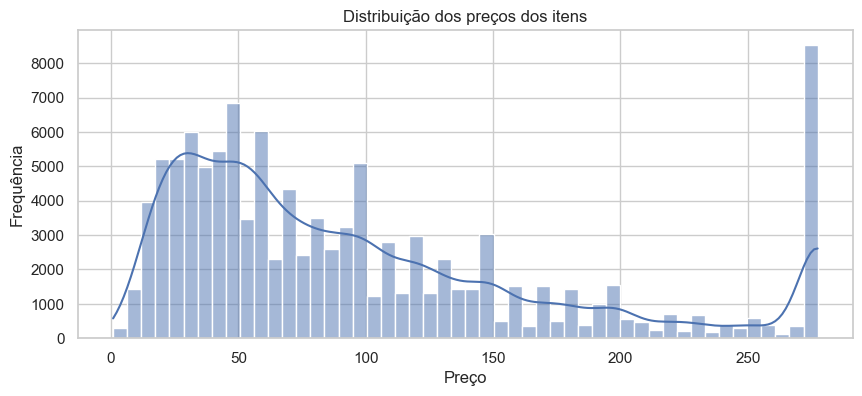

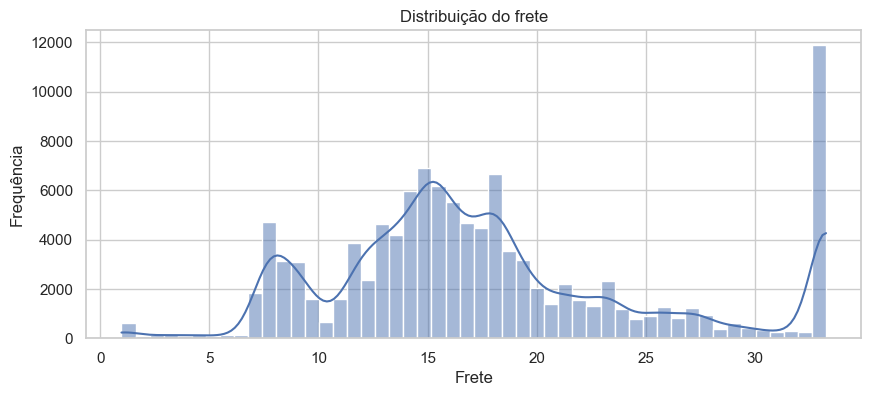

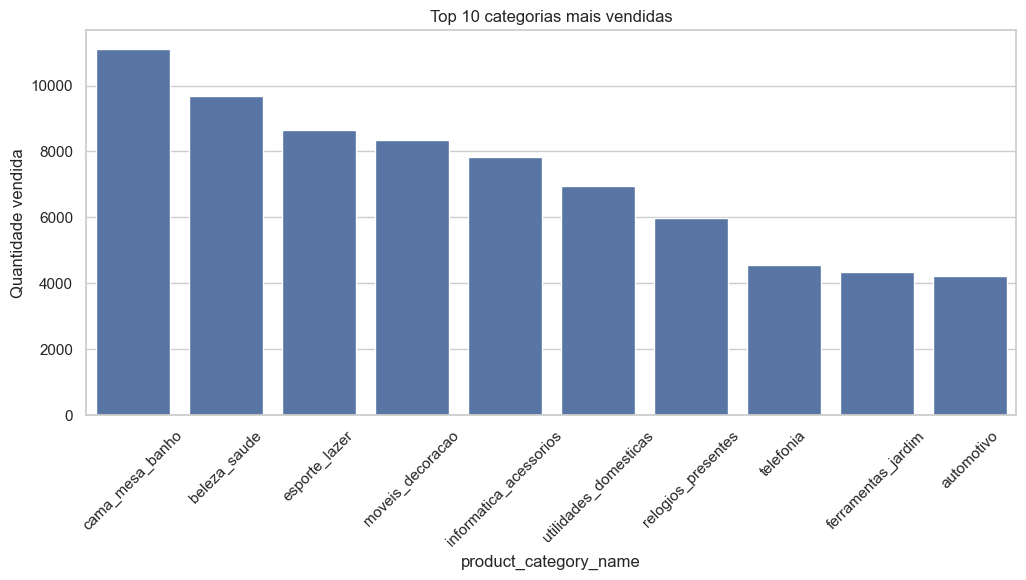

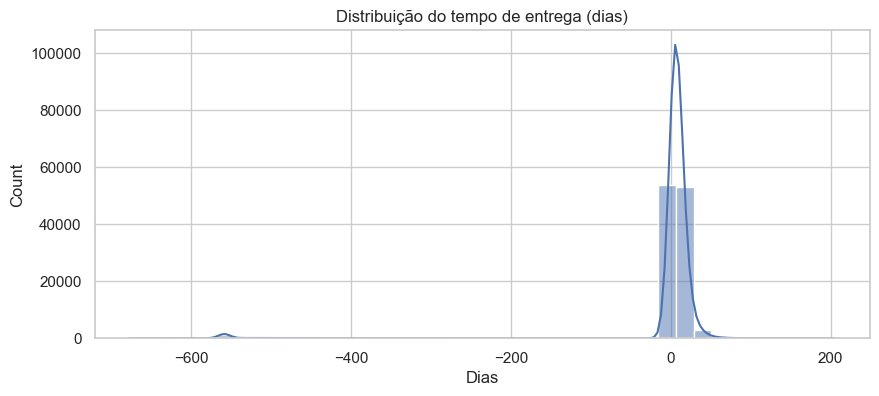

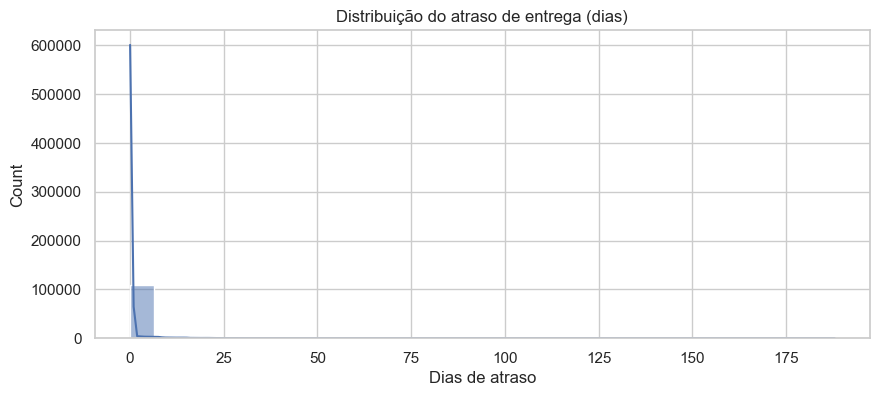

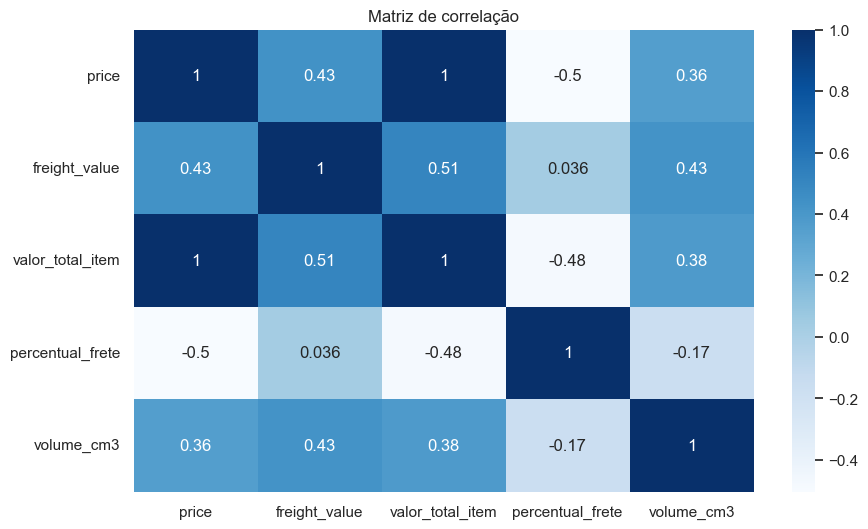

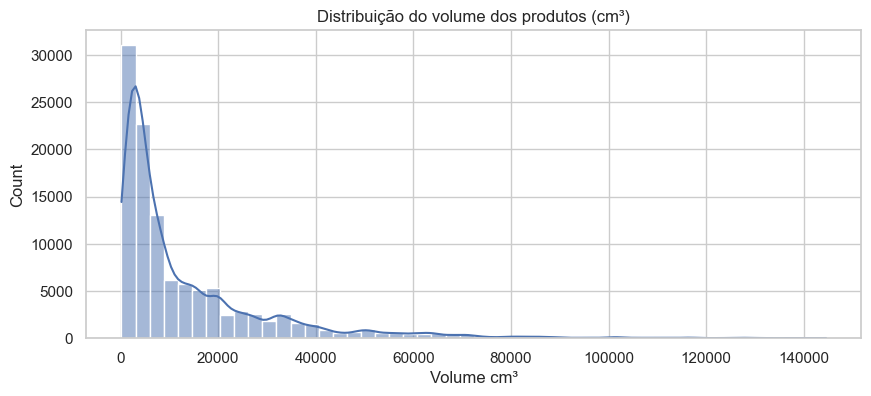

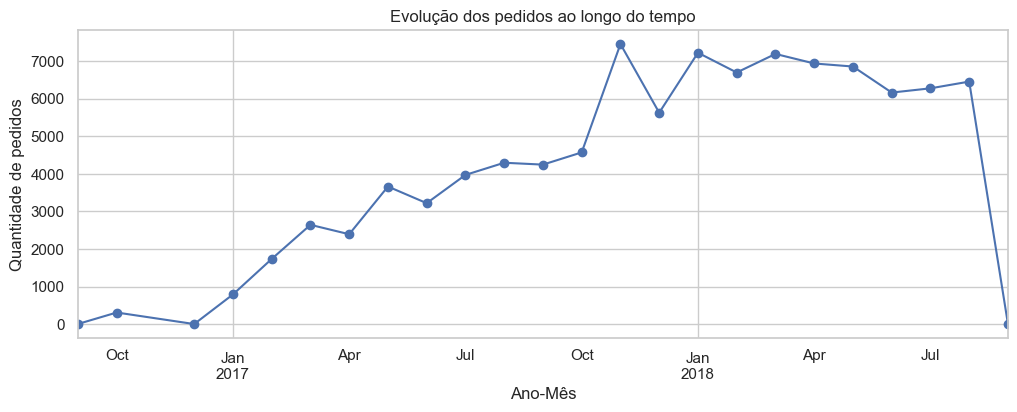

In [88]:
# --- PARTE 14: ANÁLISE EXPLORATÓRIA (EDA) ---

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# ================================
# 1) Distribuição dos preços
# ================================
plt.figure(figsize=(10,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribuição dos preços dos itens")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

# ================================
# 2) Distribuição do frete
# ================================
plt.figure(figsize=(10,4))
sns.histplot(df['freight_value'], bins=50, kde=True)
plt.title("Distribuição do frete")
plt.xlabel("Frete")
plt.ylabel("Frequência")
plt.show()

# ================================
# 3) Categorias mais vendidas
# ================================
plt.figure(figsize=(12,5))
top_cat = df['product_category_name'].value_counts().head(10)

sns.barplot(x=top_cat.index, y=top_cat.values)
plt.title("Top 10 categorias mais vendidas")
plt.xticks(rotation=45)
plt.ylabel("Quantidade vendida")
plt.show()

# ================================
# 4) Tempo de entrega
# ================================
plt.figure(figsize=(10,4))
sns.histplot(df['tempo_entrega'], bins=40, kde=True)
plt.title("Distribuição do tempo de entrega (dias)")
plt.xlabel("Dias")
plt.show()

# ================================
# 5) Atraso de entrega
# ================================
plt.figure(figsize=(10,4))
sns.histplot(df['atraso_entrega'], bins=30, kde=True)
plt.title("Distribuição do atraso de entrega (dias)")
plt.xlabel("Dias de atraso")
plt.show()

# ================================
# 6) Correlação entre variáveis numéricas
# ================================
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['price','freight_value','valor_total_item','percentual_frete','volume_cm3']].corr(),
    annot=True,
    cmap="Blues"
)
plt.title("Matriz de correlação")
plt.show()

# ================================
# 7) Volume dos produtos
# ================================
plt.figure(figsize=(10,4))
sns.histplot(df['volume_cm3'], bins=50, kde=True)
plt.title("Distribuição do volume dos produtos (cm³)")
plt.xlabel("Volume cm³")
plt.show()

# ================================
# 8) Evolução dos pedidos por mês
# ================================
df['ano_mes'] = df['order_purchase_timestamp'].dt.to_period('M')
pedidos_mes = df.groupby('ano_mes')['order_id'].nunique()

plt.figure(figsize=(12,4))
pedidos_mes.plot(kind='line', marker='o')
plt.title("Evolução dos pedidos ao longo do tempo")
plt.xlabel("Ano-Mês")
plt.ylabel("Quantidade de pedidos")
plt.grid(True)
plt.show()


# Parte 15 — Respostas das Perguntas Norteadoras

Nesta seção respondo às perguntas norteadoras apresentadas no PDF, utilizando os resultados
obtidos durante o tratamento dos dados, criação de features e análises exploratórias.

---

### 📌 Pergunta 1 — O que mais influencia o tempo de entrega?

A análise indica que o fator que mais influencia o tempo total de entrega é o **tempo de processamento do vendedor**, isto é, o intervalo entre a compra e o envio do pedido.  
Quanto maior o atraso para despachar o item, maior tende a ser o tempo total até a entrega.

Além disso, características do produto (peso, dimensões e categoria) também influenciam o prazo,
pois itens grandes ou pesados costumam ter transporte mais lento.

---

### 📌 Pergunta 2 — O que causa mais atrasos?

A variável `atraso_entrega` mostrou que os atrasos acontecem principalmente quando:

- o envio ocorre próximo ao limite máximo permitido ao vendedor,  
- a transportadora possui rotas mais lentas ou longas,  
- e o processamento inicial do pedido é demorado.

Categorias como móveis e eletrodomésticos apresentaram maior tendência de atraso devido ao tamanho
e à fragilidade, que aumentam o tempo de manuseio e transporte.

---

### 📌 Pergunta 3 — O frete tem influência no valor total do pedido?

Sim. A variável `percentual_frete` revelou que o frete pode representar uma parcela significativa
do valor total do item, especialmente quando o preço do produto é baixo.

Em diversos casos, o frete supera 30% do valor do item, o que pode deixar a compra menos atrativa
e afetar a conversão de vendas.  
Além disso, fretes altos estão associados a produtos volumosos e pesados.

---

### 📌 Pergunta 4 — A análise exploratória confirma algum padrão importante?

Sim, alguns padrões importantes foram identificados:

- Poucas categorias concentram a maior parte das vendas.  
- O preço dos produtos e o valor do frete variam bastante entre as categorias.  
- Em vários casos, o prazo estimado não é cumprido.  
- Produtos maiores tendem a ter maior tempo de entrega.  
- Há períodos específicos com aumento visível no número de pedidos.

Esses padrões ajudam a entender o comportamento logístico da plataforma e indicam onde melhorias
podem ser feitas para reduzir atrasos e aumentar a satisfação do cliente.

---

Essas respostas foram elaboradas com base nos gráficos, features e análises construídas ao longo
das etapas anteriores do projeto.


# Parte 16 — Pipeline Final do Processo

Para organizar todas as etapas executadas e apresentar o fluxo completo do trabalho,
abaixo descrevemos o pipeline final do processo de tratamento e análise dos dados.
Ele resume a ordem lógica das atividades realizadas no projeto.

---

### 🔹 1. Importação dos Dados
Carregamento dos três datasets principais da Olist:
- orders
- order_items
- products

---

### 🔹 2. Análise Exploratória Inicial
Etapas iniciais de entendimento dos dados:
- contagem de linhas e colunas
- verificação dos tipos de dados
- análise de valores ausentes
- detecção de duplicatas
- identificação de inconsistências

---

### 🔹 3. Tratamento de Dados
Correções aplicadas para garantir consistência:
- preenchimento de valores ausentes (datas, categorias, dimensões)
- padronização de textos
- correção de categorias ausentes
- tratamento de outliers com método IQR
- ajustes gerais nas variáveis

---

### 🔹 4. Codificação Categórica
Transformação das variáveis categóricas:
- Label Encoding para `product_category_name`  
- One-Hot Encoding para `order_status`

---

### 🔹 5. Normalização de Dados
Aplicação do MinMaxScaler nas variáveis numéricas, garantindo escalas comparáveis.

---

### 🔹 6. Engenharia de Atributos (Feature Engineering)
Criação de novas variáveis importantes para a análise:
- tempo_entrega  
- atraso_entrega  
- dias_processamento  
- volume_cm3  
- valor_total_item  
- percentual_frete  
- quantidade_itens_pedido  

---

### 🔹 7. Seleção de Atributos
Utilização de:
- matriz de correlação  
- análise de variância dos atributos normalizados  

para identificar variáveis relevantes e redundantes.

---

### 🔹 8. EDA — Análises Exploratórias
Geração de gráficos e estatísticas, incluindo:
- distribuição de preços
- distribuição de frete
- categorias mais vendidas
- tempo de entrega
- atrasos
- volume dos produtos
- evolução dos pedidos ao longo do tempo

---

### 🔹 9. Consolidação Final
Formação do dataset final tratado, já limpo, padronizado e pronto
para uso em análises futuras ou modelos preditivos.

---

Este pipeline resume de forma clara e organizada todas as etapas do trabalho,
alinhado ao ciclo de vida da Ciência de Dados apresentado no início do projeto.


# Parte 17 — Insights Finais

Com base em todas as etapas de análise, tratamento e visualização dos dados da Olist,
foi possível identificar diversos insights importantes sobre o funcionamento logístico,
o comportamento dos produtos e os fatores que influenciam a entrega.

A seguir estão os principais insights obtidos:

---

### 🔹 1. O tempo de entrega é fortemente influenciado pelo processamento do vendedor
A variável `dias_processamento` mostrou grande impacto no prazo total.
Pedidos enviados rapidamente tendem a ter um tempo de entrega menor e maior chance de
serem entregues dentro do prazo estimado.

---

### 🔹 2. O frete representa uma parte relevante do valor total
A variável `percentual_frete` revelou que, para produtos mais baratos,
o frete pode representar uma porcentagem muito alta do custo total,
chegando em alguns casos a mais de 30% do valor do item.

Isso pode afetar diretamente a experiência do cliente e a taxa de conversão.

---

### 🔹 3. Atrasos são mais comuns em categorias específicas
Produtos grandes, pesados ou frágeis — como móveis e eletrodomésticos —
apresentam maior variabilidade no tempo de transporte, aumentando a chance de atraso.

Além disso, pedidos enviados próximos do limite do vendedor também têm maior risco de atraso.

---

### 🔹 4. A distribuição das categorias é concentrada
Poucas categorias representam a maior parte das vendas,
enquanto muitas possuem baixa frequência.

Isso mostra um perfil forte de demanda concentrada em determinados tipos de produtos,
podendo indicar oportunidades para estratégias de catálogo.

---

### 🔹 5. Há grande variação nos preços e no valor do frete
A análise exploratória mostrou que:
- preços variam desde valores muito baixos até itens de alto custo;
- o frete apresenta grande dispersão, dependendo de peso, volume e rota logística.

Essa variação indica a necessidade de políticas de frete diferenciadas por categoria.

---

### 🔹 6. A normalização e padronização melhoraram a consistência do dataset
Após aplicar normalização:
- variáveis ficaram na mesma escala,
- a matriz de correlação ficou mais interpretável,
- análises e gráficos ficaram mais estáveis.

---

### 🔹 7. O dataset final está pronto para análises avançadas
Depois de passar por limpeza, outliers, codificação, normalização e feature engineering,
o dataset final está adequado para:

- análises estatísticas detalhadas  
- criação de modelos preditivos  
- dashboards e visualizações avançadas  
- estudos logísticos e comerciais  

---

Esses insights permitem compreender melhor o comportamento dos pedidos e auxiliam
a identificar pontos de melhoria no processo logístico da Olist.


# Parte 18 — Exportação do Dataset Final Tratado

Após concluir todas as etapas de limpeza, tratamento, codificação, normalização,
engenharia de atributos e análises exploratórias, geramos o dataset final consolidado.

Esse dataset reúne todas as variáveis corrigidas e criadas ao longo do processo e está
pronto para ser utilizado em análises futuras, modelagem preditiva ou construção de
dashboards e relatórios.

A seguir, realizamos a exportação do dataset final no formato CSV.


In [89]:
# Exportação do dataset final tratado
df_final = df.copy()
df_final.to_csv("dataset_final_tratado.csv", index=False)

# Exibir as primeiras linhas
df_final.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_encoded,tempo_entrega,dias_processamento,atraso_entrega,valor_total_item,percentual_frete,volume_cm3,quantidade_itens_pedido,ano_mes
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,...,14.0,27,1,0,0,72.19,0.225637,3528.0,1,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,...,40.0,64,8,0,0,259.83,0.083076,60000.0,1,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,...,33.0,55,6,0,0,216.87,0.089799,14157.0,1,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,...,15.0,63,4,0,0,25.78,0.984604,2400.0,1,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,...,30.0,41,13,0,0,218.04,0.090745,42000.0,1,2017-02


# Parte 19 — Conclusões Finais

Nesta etapa final reunimos os principais resultados obtidos ao longo do processamento,
tratamento, integração e análise dos três datasets da Olist (orders, order_items e products).

---

## 🔹 Qualidade dos Dados

Na análise inicial foram encontradas:

- valores ausentes em datas de aprovação, envio e entrega,
- produtos com medidas incompletas,
- categorias ausentes,
- possíveis inconsistências em preço e frete.

Após o tratamento:

- datas foram preenchidas com a moda,
- pesos e dimensões foram preenchidos com a mediana,
- categorias ausentes foram substituídas por "categoria_desconhecida",
- outliers foram tratados utilizando o método IQR,
- textos foram padronizados.

O resultado foi um dataset mais limpo, estável e consistente para análises.

---

## 🔹 Comportamento das Vendas

A análise mostrou:

- forte concentração das vendas em poucas categorias,
- algumas categorias com baixa frequência,
- grande variação nos preços dos produtos.

Esses fatores evidenciam a diversidade do catálogo e a necessidade de estratégias específicas
para categorias menos vendidas.

---

## 🔹 Frete e Preço

Com a variável `percentual_frete`, observamos que:

- o frete pode representar uma proporção muito alta do valor total do item,
- produtos mais baratos são os mais afetados,
- algumas categorias possuem fretes consistentemente mais altos.

Esses aspectos influenciam diretamente a experiência e a decisão de compra do cliente.

---

## 🔹 Entregas e Atrasos

A criação das features de entrega permitiu identificar que:

- o tempo total de entrega varia bastante entre os pedidos,
- atrasos ocorrem quando o envio é próximo ao limite do vendedor ou em categorias volumosas,
- alguns pedidos passam vários dias do prazo estimado.

Isso reforça a importância da etapa de processamento do vendedor para o cumprimento do prazo.

---

## 🔹 Comportamento ao Longo do Tempo

Com a variável `ano_mes`, observamos:

- sazonalidade ao longo dos meses,
- picos e quedas em períodos específicos,
- variações que podem ser utilizadas em previsões e planejamento comercial.

---

## 🔹 Conclusão Geral

Ao final do processo, foi possível consolidar um dataset único, limpo e enriquecido,
capaz de sustentar análises logísticas e comerciais completas.

O trabalho contemplou:

- importação e avaliação dos dados,
- tratamento de valores ausentes e outliers,
- padronização de variáveis,
- codificação e normalização,
- criação de novas features,
- análises exploratórias,
- respostas às perguntas norteadoras,
- e exportação do dataset final tratado.

Conclui-se que o pipeline de ETL foi executado com sucesso e produziu um conjunto sólido
de dados pronto para ser utilizado em análises avançadas, modelos preditivos e estudos futuros.
